<a href="https://colab.research.google.com/github/LXHayato/Sawing_Reinforcement_L/blob/main/sawing_Reinforcement_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

今は0周目
今は10周目
今は20周目
今は30周目
今は40周目
今は50周目
今は60周目
今は70周目
今は80周目
今は90周目
今は100周目
今は110周目
今は120周目
今は130周目
今は140周目
今は150周目
今は160周目
今は170周目
今は180周目
今は190周目
今は200周目
今は210周目
今は220周目
今は230周目
今は240周目
今は250周目
今は260周目
今は270周目
今は280周目
今は290周目
今は300周目
今は310周目
今は320周目
今は330周目
今は340周目
今は350周目
今は360周目
今は370周目
今は380周目
今は390周目
今は400周目
今は410周目
今は420周目
今は430周目
今は440周目
今は450周目
今は460周目
今は470周目
今は480周目
今は490周目
今は500周目
今は510周目
今は520周目
今は530周目
今は540周目
今は550周目
今は560周目
今は570周目
今は580周目
今は590周目
今は600周目
今は610周目
今は620周目
今は630周目
今は640周目
今は650周目
今は660周目
今は670周目
今は680周目
今は690周目
今は700周目
今は710周目
今は720周目
今は730周目
今は740周目
今は750周目
今は760周目
今は770周目
今は780周目
今は790周目
今は800周目
今は810周目
今は820周目
今は830周目
今は840周目
今は850周目
今は860周目
今は870周目
今は880周目
今は890周目
今は900周目
今は910周目
今は920周目
今は930周目
今は940周目
今は950周目
今は960周目
今は970周目
今は980周目
今は990周目


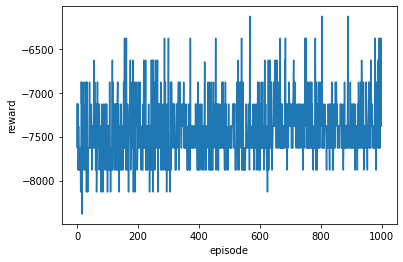

In [17]:
#とりあえずカテドラルローブのみ
import numpy as np
import matplotlib.pyplot as plt
import copy

#変数の定義
action = None
reward = None

#Q学習
class QL_Agent:
  def __init__(self, alpha=.2, epsilon=.1, gamma=.99, actions=None, observation=None):
    self.alpha=alpha
    self.gamma=gamma
    self.epsilon=epsilon
    self.reward_history=[]
    self.actions=actions
    self.state=str(observation)
    self.ini_state=str(observation)
    self.previous_state=None
    self.previous_action=None
    self.q_values=self._init_q_values()

#Qテーブルの初期化
  def _init_q_values(self):
    q_values={}
    q_values[self.state]=np.repeat(0.0, len(self.actions))
    return q_values

#状態の初期化
  def init_state(self):
    self.previous_state=copy.deepcopy(self.ini_state)
    self.state=copy.deepcopy(self.ini_state)
    return self.state

#ε-greedy選択
  def act(self):
    #ランダム行動
    if np.random.uniform() < self.epsilon:
      action=np.random.randint(0, len(self.q_values[self.state]))
    #greedy行動
    else:
      action=np.argmax(self.q_values[self.state])

    self.previous_action=action
    return action

#次の状態と報酬の観測
  def observe(self, next_state, reward=None):
    next_state=str(next_state)
    #初めて訪れる状態であれば
    if next_state not in self.q_values:
      self.q_values[next_state]=np.repeat(0.0, len(self.actions))

    self.previous_state=copy.deepcopy(self.state)
    self.state=next_state

    if reward is not None:
      self.reward_history.append(reward)
      self.learn(reward)
    
#Q値の更新
  def learn(self, reward):
    q=self.q_values[self.previous_state][self.previous_action]
    max_q=max(self.q_values[self.state])
    self.q_values[self.previous_state][self.previous_action]=q+(self.alpha*(reward+(self.gamma*max_q)-q))


#World
class World:
  def __init__(self):
    self.actions ={
        "UL":0,"UC":1,"UR":2,
        "CL":3,"CC":4,"CR":5,
        "DL":6,"DC":7,"DR":8
    }

#布初期値
    self.Start_map=np.array([[100,98,100],
                   [100,150,100],
                   [100,98,100]])
#布現在値
    self.Now_map = copy.deepcopy(self.Start_map)


#集中力
#Lv60、光の針時
#    self.start_con = 213
#    self.agent_con = copy.deepcopy(selfstart_con)

#行動の実行
#状態、報酬、ゴールしたかを返却

  def step(self, action, n):  
    Cloth=np.sum(abs(self.Now_map))
    #Cloth = copy.deepcopy(self.agent_con)
    n+=1
    if n > 50:
      exit()

#ひとまずこの書き方に乗っ取って、集中力が足りない行動も選べるようにする。
#選んだら、何も起こらず報酬を減らす。
#      if self._is_possible_action(Concentration, action) == False:
#        return self.agent_con, -1, False

    if action == self.actions["UL"]:
      self.Now_map[0][0]-=25
    elif action == self.actions["UC"]:
      self.Now_map[0][1]-=25
    elif action == self.actions["UR"]:
      self.Now_map[0][2]-=25
    elif action == self.actions["CL"]:
      self.Now_map[1][0]-=25
    elif action == self.actions["CC"]:
      self.Now_map[1][1]-=25
    elif action == self.actions["CR"]:
      self.Now_map[1][2]-=25
    elif action == self.actions["DL"]:
      self.Now_map[2][0]-=25
    elif action == self.actions["DC"]:
      self.Now_map[2][1]-=25
    elif action == self.actions["DR"]:
      self.Now_map[2][2]-=25

#エピソード終了の確認

    Cloth=np.sum(abs(self.Now_map))
    reward = self._compute_reward(Cloth,n)
    is_goal = self._is_end_episode(n,Cloth)
    return self.Now_map, reward, is_goal, n

#終了条件の確認
#今はn=38で終了
  def _is_end_episode(self,n,Cloth):
   
    if n == 38:
      n = 0
      return True
    else:
      return False

#報酬
#0からの剥離量*5がそのまま点数となる。
  def _compute_reward(self, Cloth,n):
    if n < 38:
      return 0
    else:
      return 100-Cloth*5

  def reset(self):

    self.Now_map=copy.deepcopy(self.Start_map)
    return self.Start_map

#if __name__ =='__main':
grid_env=World()
ini_state=grid_env.Start_map
agent = QL_Agent(epsilon=0.1, actions=np.arange(9),observation=ini_state)
nb_episode = 1000
rewards = []
is_end_episode = False
for episode in range(nb_episode):
  if episode % 10 == 0:
    print(f'今は{episode}周目')
  episode_reward = []
  n = 0
  while(is_end_episode == False):
    action = agent.act()
    state, reward, is_end_episode, n = grid_env.step(action, n)
    agent.observe(state, reward)
    episode_reward.append(reward)
  rewards.append(np.sum(episode_reward))
  state = grid_env.reset()
  agent.observe(state)
  is_end_episode = False

#結果のプロット
plt.plot(np.arange(nb_episode), rewards)
plt.xlabel("episode")
plt.ylabel("reward")
plt.savefig("result.jpg")
plt.show()
